# Automatizace ve fyzice: Robot Operating System (ROS)

Petr Čermák  
2024-12-19

## Připojte se

[cermak.science/teaching/automation/lectures/11-ros/](https://cermak.science/teaching/automation/lectures/11-ros/presentation.html)

# Úvod

## Co je ROS?

-   *The Robot Operating System (ROS)* - flexibilní framework pro psaní
    robotického softwaru. Jedná se o soubor nástrojů, knihoven a
    konvencí, které mají za cíl zjednodušit vytváření složitých chování
    robotů na nejrůznějších robotických platformách. [ROS
    WIKI](http://www.ros.org/about-ros/)
-   Open Source
-   není to úplně *operating system*

### Historicky

-   Stanford (počátek tisíciletí)
-   Willow Garage (2007)
-   Open Robotics (2013)

## 

<https://vimeo.com/245826128>

## Výhody ROS

Umožňuje stavět na znalostech a schopnostech současného stavu robotické
technologie a teorie.

-   Kompatibilita hardwaru a softwaru

-   Předkompilované algoritmy pro robotiku

-   Vícevláknové, paralelní zpracování, distribuované výpočty

. . .

### Kde se používá?

-   Výzkum (technika)
-   Studenti
-   Hobby
-   Průmysl - hlavně *start-upy*

### ROS v laboratoři? Možná za pár let.

# Architektura

## Přehled

<u>Úkol:</u> Chci robota, který se bude přenášet vzorky z ledničky do
měřící aparatury

-   Jak má robot vypadat?
-   Jaké hlavní prvky nebo součásti jsou pro robota potřebné?

. . .

### Jak funguje systém ROS?

Systém propojených *nodes*

-   každý uzel představuje jinou součást robotického systému
    -   Laser
    -   Kinematika pohonu
    -   Navigace
    -   Manipulátor
    -   atd.

## Hardware a software

Každý uzel může mít zdrojový kód, spustitelné soubory a datové soubory

-   C++
-   Python
-   *značkovací jazyky* jako (XML, YAML)

Existuje mnoho připravených nodes

-   hotoví roboti (Adept, Clearpath, UR, Meca500)
-   LIDAR (SICK, RPLidar atd.) a kamery (webová kamera, Kinect,
    Opti-track).
-   Ovladače motorů (Roboteq, ROSARIA)

## ROS komponenty

-   ROS Master service registruje ostatní uzly v systému ROS
    -   běží jako první
    -   `roscore`
-   každý *node* je pak další principielně nezávislý proces

### Komunikace

Uzly komunikují třemi různými způsoby.

-   [topics](https://docs.ros.org/en/humble/Concepts/Basic/About-Topics.html) -
    publikování a přihlašování k odběru zpráv
-   [parameter
    server](https://docs.ros.org/en/humble/Concepts/Basic/About-Parameters.html) -
    statická data
-   [services](https://docs.ros.org/en/humble/Concepts/Basic/About-Services.html) -
    volání podprogramů (RPC - remote procedure call)
    -   model `request --> reply`
-   [actions](https://docs.ros.org/en/humble/Concepts/Basic/About-Actions.html) -
    dlouhotrvající podprogramy, jdou zrušit v půlce, skončí callbackem

## Předávání zpráv

Uzly (*nodes*) mohou komunikovat prostřednictvím **publish** a
**subscribe** různých témat.

Téma je informace generovaná publikujícím uzlem, které jsou zpřístupněny
odebírajícímu uzlu.

-   Uzel může téma publikovat. Tento uzel je `publisher`.
-   Uzel se může přihlásit k odběru tématu. Tento uzel je `subscriber`.
-   Většina uzlů publikuje a odebírá více témat.
-   Celý systém je anonymní

## Data

-   data dostupná uzlům v systému
-   každé téma má název
-   data jsou uložena a přenášena ve standardních datových typech ROS
-   obecně jsou data streamovaná, ale nemusí být.

### Datové typy

[wiki](http://wiki.ros.org/msg)

-   stdmsgs/int32
-   stdmsgs/float32
-   geometrymsgs/Point
-   geometrymsgs/Pose
-   navmsgs/Odometry
-   navmsgs/Path

## Předávání zpráv

Obrázek místo slov [RQT Graph](http://wiki.ros.org/rqt_graph)

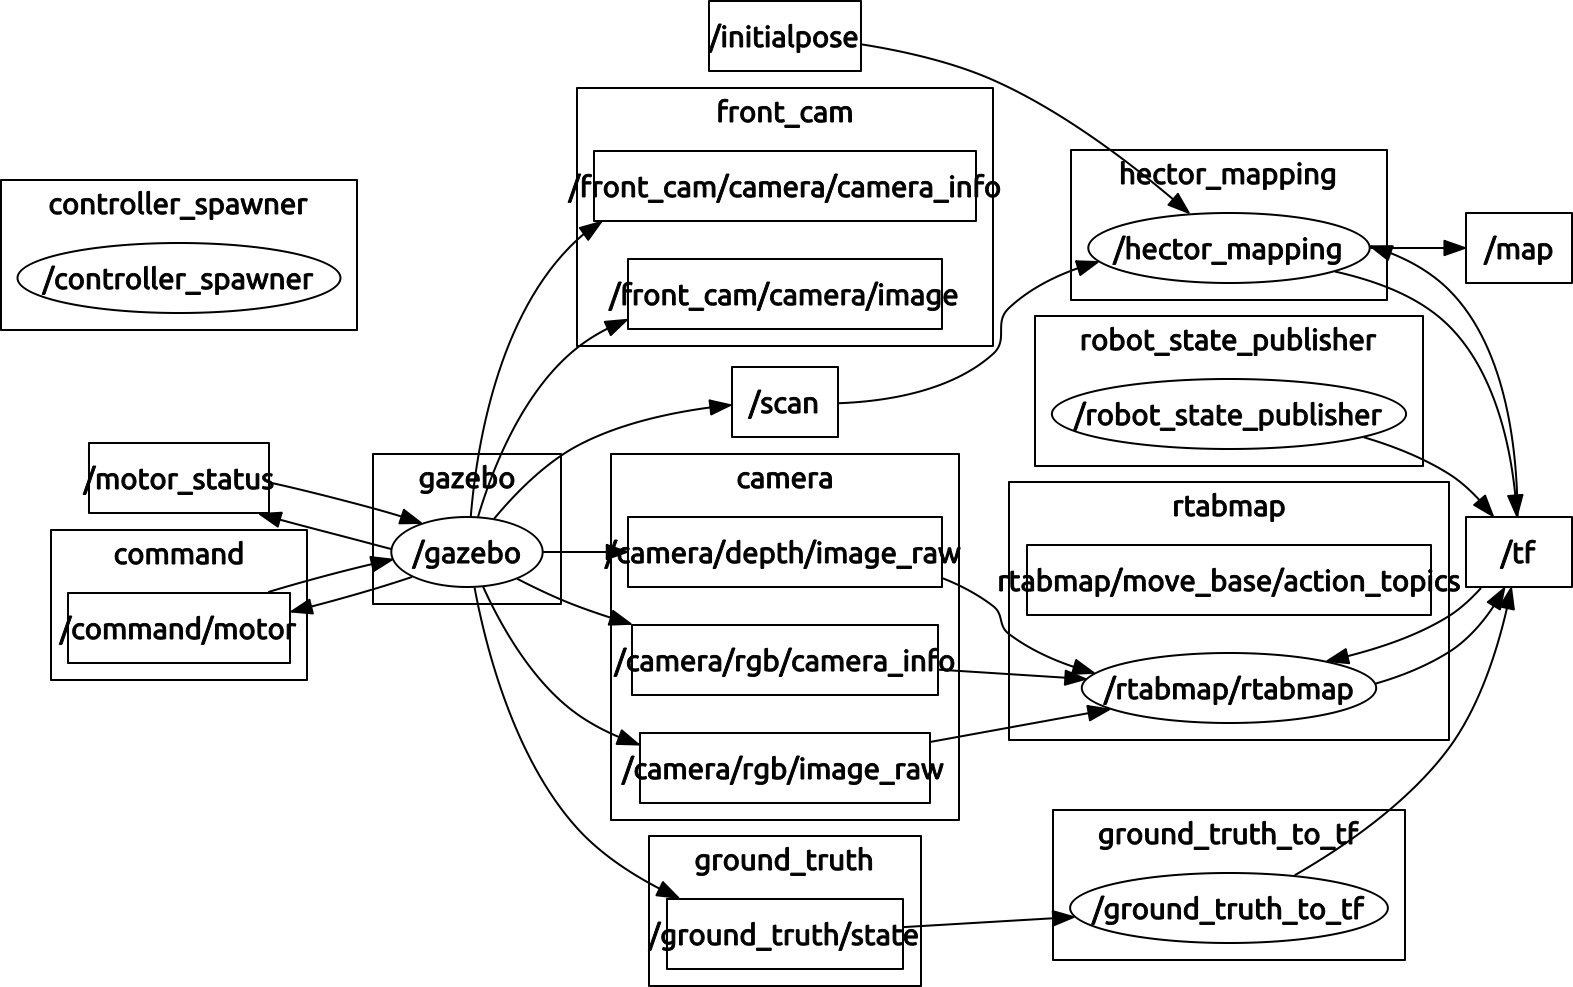

# Cvičení - napojíme se na robota!!

## Rosbridge

Standardní komunikace v ROS2 je pomocí [DDS
protokolu](https://www.dds-foundation.org/). Užívá UDP packety a funguje
defaultně v jednom subnetu.

**rosbridge**

-   protokol postavený na JSON

``` json
{ "op": "subscribe",
  "topic": "/cmd_vel",
  "type": "geometry_msgs/Twist"
}
```

-   rosbridge server - komunikace pomocí websocket -\> snandé vzdálené
    připojení

## roslibpy

-   python knihovna `roslibpy`
-   [cviceni.py](https://cermak.science/teaching/automation/lectures/11-ros/cviceni.py)
-   [želva - dokumentace](https://wiki.ros.org/turtlesim)